In [22]:
import pandas as pd

In [23]:
data = pd.read_csv("../shared_data_read_only/Census-Data/ACSST5Y2022.S2201-Data.csv", low_memory = False)

In [24]:
columns_to_drop = [column for column in data.columns if column.endswith('M')]
data = data.drop(columns = columns_to_drop)

In [25]:
print(len(data.columns))

231


In [26]:
number_cols = [column for column in data.columns if ("C05" in column or "C01" in column or "C03" in column)]
data = data.drop(columns = number_cols)

In [27]:
print(len(data.columns))

117


In [28]:
data = data[data['NAME'].str.contains('Pennsylvania', na=False)]


In [29]:
print(len(data))

for column in data.columns:
    if column not in ['NAME', 'GEO_ID']:
        data[column] = pd.to_numeric(data[column], errors='coerce')

3446


S2201_C02_025E    45
S2201_C02_026E    45
S2201_C02_032E    45
S2201_C02_004E    45
dtype: int64
       S2201_C02_025E  S2201_C02_026E  S2201_C02_032E  S2201_C02_004E
63419            97.0             0.2             5.3            63.7
63420            98.7             0.0             0.0            78.2
63421            94.3             0.0             3.4            65.4
63422            91.6             1.8            10.4            59.6
63423            93.0             2.4             8.2            56.1
...               ...             ...             ...             ...
66860            96.7             0.7             1.8            70.1
66861            95.4             2.5             2.1            46.6
66862            94.9             1.3             2.0            70.5
66863            97.3             1.2             1.6            59.1
66864            96.4             1.1             0.7            62.2

[3401 rows x 4 columns]


/tmp/ipykernel_26253/3869422296.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_data.dropna(inplace = True)
/tmp/ipykernel_26253/3869422296.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_data.rename(columns={


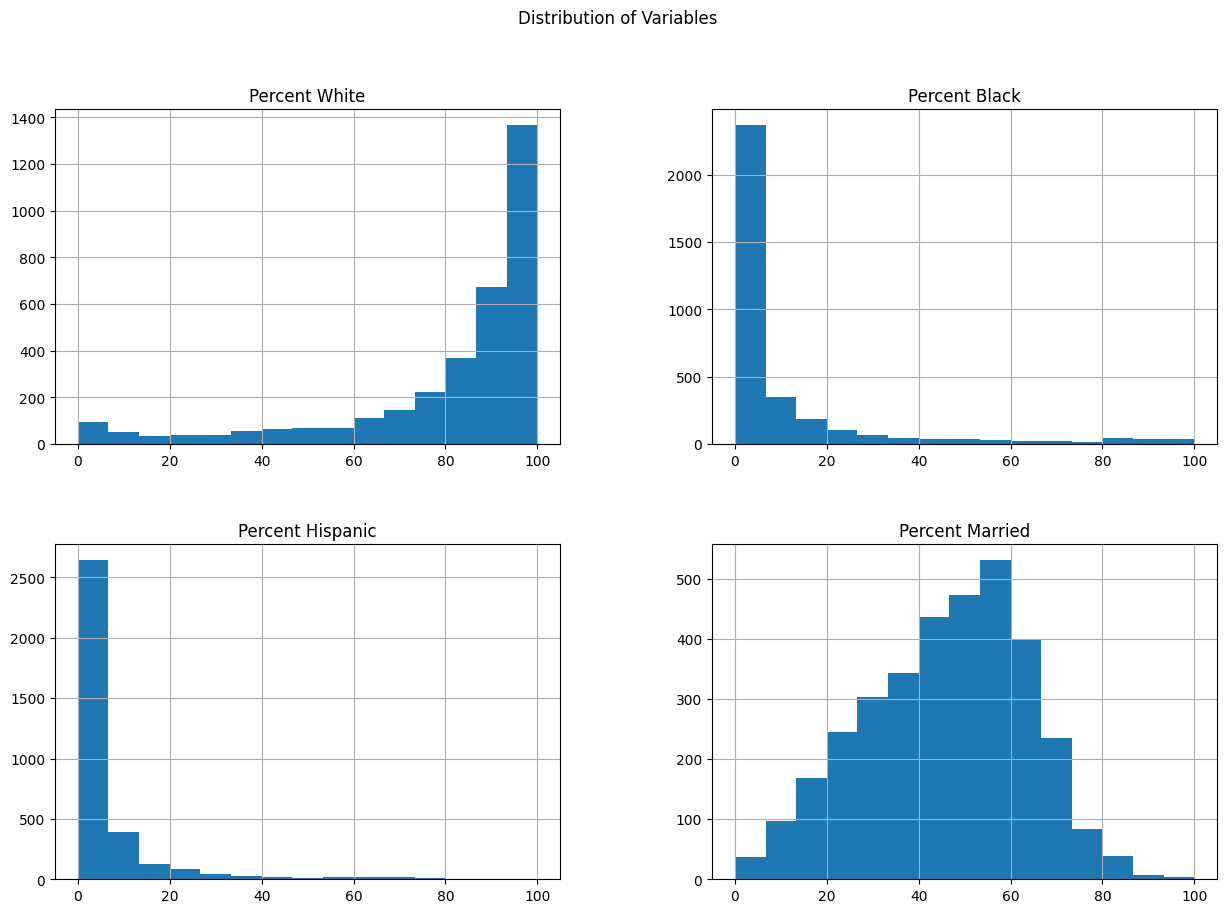

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


finance_interest = [
    'S2201_C02_025E',  # Percent White alone
    'S2201_C02_026E',  # Percent Black or African American alone
    'S2201_C02_032E',  # Percent Hispanic or Latino origin (of any race)
    'S2201_C02_004E',  # Percent Married-couple family
]

financial_data = data[finance_interest]
print(financial_data.isna().sum())

financial_data.dropna(inplace = True)
print(financial_data)

financial_data.rename(columns={
    'S2201_C02_025E': 'Percent White',
    'S2201_C02_026E': 'Percent Black',
    'S2201_C02_032E': 'Percent Hispanic',
    'S2201_C02_004E': 'Percent Married'
}, inplace=True)

financial_data.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Variables')
plt.show()


# print(financial_data.head())


In [31]:
(data["S2201_C04_007E"]).mean()






29.01826113116727

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [34]:
columns_of_interest = [
    'S2201_C04_002E',  # Percent households with one or more people 60 years and over receiving food stamps/SNAP
    'S2201_C04_003E',  # Percent households with no people 60 years and over receiving food stamps/SNAP
    'S2201_C04_023E',  # Percent households with one or more people with a disability
    'S2201_C04_024E',  # Percent households with no persons with a disability
    'S2201_C04_005E',  # Percent other family households
    'S2201_C04_006E',  # Percent male householder, no spouse present
    'S2201_C04_007E',  # Percent female householder, no spouse present
    'S2201_C04_025E',  # Percent White alone
    'S2201_C04_026E',  # Percent Black or African American alone
    'S2201_C04_027E',  # Percent American Indian and Alaska Native alone
    'S2201_C04_028E',  # Percent Asian alone
    'S2201_C04_030E',  # Percent some other race alone
    'S2201_C04_032E',   # Percent Hispanic or Latino origin (of any race)
    'S2201_C04_036E', # No Working Member
    'S2201_C04_037E', # One Working Member
    'S2201_C04_038E', # Two or more Working Member,
    'S2201_C06_021E', # Below Poverty, Not receiving foot stamps
    'S2201_C02_021E', # Below Poverty Line
]

# Filter the dataset
filtered_data = data[columns_of_interest]



print(filtered_data.isna().sum())
filtered_data = filtered_data.apply(pd.to_numeric, errors='coerce')
# Drop rows with any NaN values after conversion
filtered_data.dropna(inplace=True)

# Apply clustering
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(filtered_data)
filtered_data['Cluster'] = clusters

labels = kmeans.labels_

# Add the labels to your DataFrame
filtered_data['Cluster'] = labels

# To see unique values in the 'NAME' column for each cluster, you can group the DataFrame by the 'Cluster' column
clusters = filtered_data.groupby('Cluster')

cluster_tracks = {0: set(), 1: set(), 2: set(), 3: set(), 4: set()}

columns_to_average = [
    'S2201_C02_002E',  # Percent households with one or more people 60 years and over receiving food stamps
    'S2201_C02_003E',  # Percent households with no people 60 years and over receiving food stamps/SNAP
    'S2201_C02_023E',  # Percent households with one or more people with a disability
    'S2201_C02_024E',  # Percent households with no persons with a disability
    'S2201_C02_005E',  # Percent other family households
    'S2201_C02_006E',  # Percent male householder, no spouse present
    'S2201_C02_007E',  # Percent female householder, no spouse present
    'S2201_C02_025E',  # Percent White alone
    'S2201_C02_026E',  # Percent Black or African American alone
    'S2201_C02_027E',  # Percent American Indian and Alaska Native alone
    'S2201_C02_028E',  # Percent Asian alone
    'S2201_C02_030E',  # Percent some other race alone
    'S2201_C02_032E',  # Percent Hispanic or Latino origin (of any race)
    'S2201_C02_036E',  # No Working Member (SNAP)
    'S2201_C02_037E',  # One Working Member (SNAP)
    'S2201_C02_038E'   # Two or more Working Member(SNAP)
]

cluster_sums = {}
for cluster in range(5):
    cluster_sums[cluster] = {}
    
for col in columns_to_average:
    for k, v in cluster_sums.items():
        cluster_sums[k][col] = 0
         
cluster_counts = {i: 0 for i in range(5)}

for cluster_id, cluster_data in clusters:
    for index in cluster_data.index:
        cluster_tracks[cluster_id].add(data.loc[index, 'NAME'])
        for column in columns_to_average:
            cluster_sums[cluster_id][column] += data.loc[index, column]

    
        cluster_counts[cluster_id] += 1

print(cluster_sums)
print(cluster_counts)
for i in range(5):
    total = cluster_counts[i]
    for col in columns_to_average:
        if total != 0:
            cluster_sums[i][col] /= total
        else:
            cluster_sums[i][col] = 0



S2201_C04_002E    122
S2201_C04_003E    122
S2201_C04_023E    122
S2201_C04_024E    122
S2201_C04_005E    122
S2201_C04_006E    122
S2201_C04_007E    122
S2201_C04_025E    122
S2201_C04_026E    122
S2201_C04_027E    122
S2201_C04_028E    122
S2201_C04_030E    122
S2201_C04_032E    122
S2201_C04_036E    226
S2201_C04_037E    226
S2201_C04_038E    226
dtype: int64


/opt/tljh/user/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{0: {'S2201_C02_002E': 9940.300000000003, 'S2201_C02_003E': 17359.699999999997, 'S2201_C02_023E': 9132.400000000005, 'S2201_C02_024E': 18167.6, 'S2201_C02_005E': 7622.300000000002, 'S2201_C02_006E': 1969.5000000000005, 'S2201_C02_007E': 5653.8, 'S2201_C02_025E': 15399.500000000005, 'S2201_C02_026E': 3885.2999999999997, 'S2201_C02_027E': 109.19999999999997, 'S2201_C02_028E': 972.9000000000004, 'S2201_C02_030E': 4184.400000000001, 'S2201_C02_032E': 8983.499999999995, 'S2201_C02_036E': 3816.0999999999976, 'S2201_C02_037E': 9731.500000000002, 'S2201_C02_038E': 13753.999999999998}, 1: {'S2201_C02_002E': 27487.599999999962, 'S2201_C02_003E': 32912.50000000004, 'S2201_C02_023E': 14730.300000000005, 'S2201_C02_024E': 45669.9, 'S2201_C02_005E': 7161.700000000003, 'S2201_C02_006E': 2422.2999999999956, 'S2201_C02_007E': 4740.799999999996, 'S2201_C02_025E': 53833.89999999996, 'S2201_C02_026E': 2117.7, 'S2201_C02_027E': 59.00000000000001, 'S2201_C02_028E': 1970.9000000000008, 'S2201_C02_030E': 671.

In [35]:
for k, v in cluster_tracks.items():
    print(k, len(v))

0 273
1 604
2 957
3 408
4 978


In [36]:
cluster_means = filtered_data.groupby('Cluster').mean()
val_maps = {
    'S2201_C04_002E' : "Percent households with one or more people 60 years and over receiving food stamps/SNAP",
    'S2201_C04_003E' : "Percent households with no people 60 years and over receiving food stamps/SNAP",
    'S2201_C04_023E' : "Percent households with one or more people with a disability (SNAP)",
    'S2201_C04_024E' : "Percent households with no persons with a disability(SNAP)",
    'S2201_C04_005E' : "Percent other family households(SNAP)",
    'S2201_C04_006E' : "Percent male householder, no spouse present (SNAP)",
    'S2201_C04_007E' : "Percent female householder, no spouse present (SNAP)",
    'S2201_C04_025E' : "Percent White alone (SNAP)",
    'S2201_C04_026E' : "Percent Black or African American alone (SNAP)",
    'S2201_C04_027E' : "Percent American Indian and Alaska Native alone (SNAP)",
    'S2201_C04_028E' : "Percent Asian alone (SNAP)",
    'S2201_C04_030E' : "Percent some other race alone(SNAP)",
    'S2201_C04_032E' : "Percent Hispanic or Latino origin (of any race) (SNAP)",
    'S2201_C04_036E' : "No Working Member (SNAP)",
    'S2201_C04_037E' : "One Working Member (SNAP)",
    'S2201_C04_038E' : "Two or more Working Member(SNAP)"
    
}


average_maps = {
    'S2201_C02_002E': "Percent households with one or more people 60 years and over ",
    'S2201_C02_003E':  "Percent households with no people 60 years and over ",
    'S2201_C02_023E':  "Percent households with one or more people with a disability",
    'S2201_C02_024E': "Percent households with no persons with a disability",
    'S2201_C02_005E':  "Percent other family households",
    'S2201_C02_006E':  "Percent male householder, no spouse present",
    'S2201_C02_007E':  "Percent female householder, no spouse present",
    'S2201_C02_025E':  "Percent White alone",
    'S2201_C02_026E':  "Percent Black or African American alone",
    'S2201_C02_027E':  "Percent American Indian and Alaska Native alone",
    'S2201_C02_028E':  "Percent Asian alone",
    'S2201_C02_030E':  "Percent some other race alone",
    'S2201_C02_032E':  "Percent Hispanic or Latino origin (of any race)",
    'S2201_C02_036E':  "No Working Member",
    'S2201_C02_037E':  "One Working Member",
    'S2201_C02_038E':   "Two or more Working Member"
    }

# Print the average values for each cluster
for cluster_id, cluster_data in cluster_means.iterrows():
    print(f'Cluster {cluster_id}:')
    for i in range(len(columns_of_interest)):
        print(f'  {val_maps[columns_of_interest[i]]}: {cluster_data[columns_of_interest[i]]}')
        
        print(f'  {average_maps[columns_to_average[i]]}: {cluster_sums[cluster_id][columns_to_average[i]]}')
    


Cluster 0:
  Percent households with one or more people 60 years and over receiving food stamps/SNAP: 31.034065934065932
  Percent households with one or more people 60 years and over : 36.41135531135532
  Percent households with no people 60 years and over receiving food stamps/SNAP: 68.96703296703296
  Percent households with no people 60 years and over : 63.58864468864468
  Percent households with one or more people with a disability (SNAP): 53.53589743589743
  Percent households with one or more people with a disability: 33.45201465201467
  Percent households with no persons with a disability(SNAP): 46.46520146520147
  Percent households with no persons with a disability: 66.54798534798535
  Percent other family households(SNAP): 49.11465201465201
  Percent other family households: 27.920512820512826
  Percent male householder, no spouse present (SNAP): 9.448717948717949
  Percent male householder, no spouse present: 7.214285714285716
  Percent female householder, no spouse present